In [1]:
pip install cmake

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [69]:
# import libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import load_model
from sklearn import metrics
import seaborn as sns
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

In [72]:
# python code to split data into train

cleaned_data = pd.read_excel("cleaned_data2.xlsx")

In [74]:
cleaned_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,sub_grade,annual_inc,pub_rec,revol_bal,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,recoveries,collection_recovery_fee,last_pymnt_amnt,loan_is_bad
0,11200,11200,11200.0,6.62,343.89,2,108000.0,0,37822,11676.06,11676.06,10504.53,1171.53,0.0,0.000,343.89,0
1,10000,10000,10000.0,11.14,328.06,7,65000.0,0,16623,4620.34,4620.34,2710.84,897.60,1011.9,10.119,328.06,1
2,8000,8000,8000.0,16.29,282.41,14,35000.0,0,17938,9601.94,9601.94,7446.79,2155.15,0.0,0.000,282.41,0
3,16000,16000,15950.0,7.90,500.65,4,110000.0,0,23691,16768.48,16716.08,16000.00,768.48,0.0,0.000,13269.44,0
4,4000,4000,4000.0,7.90,125.17,4,155000.0,0,43945,4252.06,4252.06,3749.42,502.64,0.0,0.000,125.17,0


In [75]:
X = cleaned_data.drop('loan_is_bad', axis = 1)
Y = cleaned_data['loan_is_bad']

In [76]:
X.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,sub_grade,annual_inc,pub_rec,revol_bal,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,recoveries,collection_recovery_fee,last_pymnt_amnt
0,11200,11200,11200.0,6.62,343.89,2,108000.0,0,37822,11676.06,11676.06,10504.53,1171.53,0.0,0.000,343.89
1,10000,10000,10000.0,11.14,328.06,7,65000.0,0,16623,4620.34,4620.34,2710.84,897.60,1011.9,10.119,328.06
2,8000,8000,8000.0,16.29,282.41,14,35000.0,0,17938,9601.94,9601.94,7446.79,2155.15,0.0,0.000,282.41
3,16000,16000,15950.0,7.90,500.65,4,110000.0,0,23691,16768.48,16716.08,16000.00,768.48,0.0,0.000,13269.44
4,4000,4000,4000.0,7.90,125.17,4,155000.0,0,43945,4252.06,4252.06,3749.42,502.64,0.0,0.000,125.17


In [77]:
Y.head()

0    0
1    1
2    0
3    0
4    0
Name: loan_is_bad, dtype: int64

In [78]:
# split into test and train
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size = 0.3, random_state=108)

In [79]:
#loading the file
trainset= x_train

In [80]:
#Printing 3 first rows of trainset
trainset.head(3)

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,sub_grade,annual_inc,pub_rec,revol_bal,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,recoveries,collection_recovery_fee,last_pymnt_amnt
10910,6000,6000,6000.0,13.11,202.49,9,34000.0,0,7689,6634.500000,6634.50,6000.0,634.50,0.0,0.0,4615.88
12113,35000,35000,35000.0,15.31,1218.61,12,5000000.0,0,975800,43114.630000,43114.63,35000.0,8114.63,0.0,0.0,58.03
30187,10000,10000,10000.0,12.12,332.72,8,75000.0,0,16348,11959.050006,11959.05,10000.0,1959.05,0.0,0.0,1314.22


In [81]:
#loading the file
testset= x_test

In [82]:
#Printing 3 first rows of testset
testset.head(3)

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,sub_grade,annual_inc,pub_rec,revol_bal,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,recoveries,collection_recovery_fee,last_pymnt_amnt
29980,5500,5500,5500.0,7.90,172.10,4,38680.0,0,4206,6063.580521,6063.58,5500.0,563.58,0.00,0.0000,2626.68
13000,10000,10000,10000.0,12.12,332.72,8,95000.0,0,6793,8026.460000,8026.46,4823.1,1493.68,1709.68,290.6456,332.72
4595,12000,12000,11975.0,14.33,412.06,11,50000.0,0,9879,13390.810000,13362.93,12000.0,1390.81,0.00,0.0000,9281.82


First, create separate arrays for the predictors (`Xtrain`) and for the target (`ytrain`):

In [83]:
#Printing 3 first rows of y trainset 
y_train.head(3)

10910    0
12113    0
30187    0
Name: loan_is_bad, dtype: int64

First, create separate arrays for the predictors (`Xtest`) and for the target (`ytest`):

In [85]:
#Printing 3 first rows of y testset 

y_test.head(3)

29980    0
13000    1
4595     0
Name: loan_is_bad, dtype: int64

In [102]:
# BUILD A MODEL
model = keras.Sequential([
    keras.layers.Dense(19, activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(5, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [103]:
# COMPILE THE MODEL
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [104]:
# SET OUT 10,000 REVIEWS FROM TRAINING DATA TO USE FOR VALIDATION
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [105]:
# EXAMINE MODEL PERFORMANCE BETWEEN TRAINING VS VALIDATION SETS
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
28/28 [==============================] - 1s 9ms/step - loss: 3266.2957 - accuracy: 0.4415 - val_loss: 982.0820 - val_accuracy: 0.7945
Epoch 2/20
28/28 [==============================] - 0s 3ms/step - loss: 829.6248 - accuracy: 0.8150 - val_loss: 651.7526 - val_accuracy: 0.8138
Epoch 3/20
28/28 [==============================] - 0s 3ms/step - loss: 411.9584 - accuracy: 0.7890 - val_loss: 169.9905 - val_accuracy: 0.8540
Epoch 4/20
28/28 [==============================] - 0s 3ms/step - loss: 119.2001 - accuracy: 0.8562 - val_loss: 68.7050 - val_accuracy: 0.8892
Epoch 5/20
28/28 [==============================] - 0s 3ms/step - loss: 59.5297 - accuracy: 0.8958 - val_loss: 50.4267 - val_accuracy: 0.9012
Epoch 6/20
28/28 [==============================] - 0s 2ms/step - loss: 45.9390 - accuracy: 0.9076 - val_loss: 41.8146 - val_accuracy: 0.9116
Epoch 7/20
28/28 [==============================] - 0s 3ms/step - loss: 39.3923 - accuracy: 0.9140 - val_loss: 35.6839 - val_accuracy: 0.918

### Deep Learning Implementation

For this last step, as the majority of ML algorithms are better fitted when the input numerical attributes have simillar scales we need to apply the Normalization method. In order to achieve this, we apply the MinMax Algorithm

In [106]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

In [107]:
model = Sequential()

model.add(
        Dense(19, activation='relu')
)

model.add(
        Dense(10, activation='relu')
)

model.add(
        Dense(5, activation='relu')
)


model.add(
        Dense(1, activation='sigmoid')
)

model.compile(
        optimizer='adam', 
        loss='binary_crossentropy', 
        metrics=['accuracy']
)

early_stop = EarlyStopping(
        monitor='val_loss', 
        mode='min', 
        verbose=1, 
        patience=25
)

model.fit(
        X_train, 
        y_train, 
        epochs=20,
        batch_size=512, 
        validation_data=(X_test, y_test),
         callbacks=[early_stop]
)

Epoch 1/20
47/47 [==============================] - 1s 5ms/step - loss: 0.6402 - accuracy: 0.8514 - val_loss: 0.5704 - val_accuracy: 0.8501
Epoch 2/20
47/47 [==============================] - 0s 2ms/step - loss: 0.4951 - accuracy: 0.8510 - val_loss: 0.4310 - val_accuracy: 0.8501
Epoch 3/20
47/47 [==============================] - 0s 2ms/step - loss: 0.3912 - accuracy: 0.8511 - val_loss: 0.3540 - val_accuracy: 0.8502
Epoch 4/20
47/47 [==============================] - 0s 2ms/step - loss: 0.3148 - accuracy: 0.8667 - val_loss: 0.2754 - val_accuracy: 0.8920
Epoch 5/20
47/47 [==============================] - 0s 2ms/step - loss: 0.2421 - accuracy: 0.9103 - val_loss: 0.2104 - val_accuracy: 0.9274
Epoch 6/20
47/47 [==============================] - 0s 2ms/step - loss: 0.1913 - accuracy: 0.9343 - val_loss: 0.1729 - val_accuracy: 0.9413
Epoch 7/20
47/47 [==============================] - 0s 2ms/step - loss: 0.1623 - accuracy: 0.9465 - val_loss: 0.1512 - val_accuracy: 0.9551
Epoch 8/20
47/47 [==

Text(0, 0.5, 'Loss')

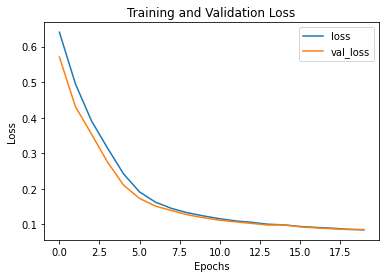

In [108]:
df = pd.DataFrame(model.history.history)[['loss','val_loss']].plot()


# Add title and axis labels
df.set_title('Training and Validation Loss')
df.set_xlabel('Epochs')
df.set_ylabel('Loss')


This validation result, the Loss plot, shows us the model is overfitted.

In [109]:
predictions = model.predict(X_test)
predictions = np.round(predictions).astype(int)
print(predictions)
#by default it takes 0.5

320/320 [==============================] - 0s 850us/step
[[0]
 [1]
 [0]
 ...
 [0]
 [0]
 [0]]


Evaluating the model accuracy


In [110]:
#cm=confusion_matrix(y_test,predictions)
confusion_matrix = metrics.confusion_matrix(y_test, predictions)

Text(0.5, 15.0, 'Predicted label')

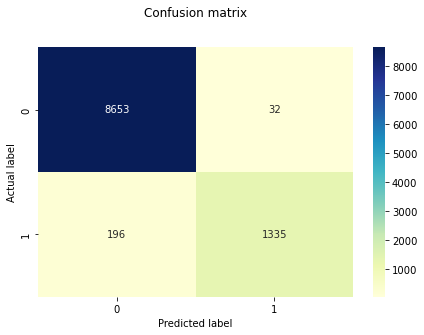

In [111]:
#Plotting the confusion map
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [91]:
# New Model Evaluation metrics on testset
print('Accuracy Score : ' + str(accuracy_score(y_test,predictions)))
print('Precision Score : ' + str(precision_score(y_test,predictions,average='macro')))
print('Recall Score : ' + str(recall_score(y_test,predictions,average='macro')))
print('F1 Score : ' + str(f1_score(y_test,predictions,average='macro')))

Accuracy Score : 0.9788566953797964
Precision Score : 0.9834049416944106
Recall Score : 0.9332240583872657
F1 Score : 0.9562706696398529
